In [1]:
import pandas as pd
import numpy as np

In [18]:
train = pd.read_csv("train_s.csv", nrows = 100000, index_col=0)
train.shape

C:\Users\Jonathan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(100000, 55)

In [19]:
train['totals.transactionRevenue'] = train['totals.transactionRevenue'].astype('float')

In [20]:
train

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Social,20161030,6201955442296075,06201955442296075_1477892744,Not Socially Engaged,1477892744,1,1477892744,Safari,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/th/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,Social,20161030,3638854205116467643,3638854205116467643_1477840657,Not Socially Engaged,1477840657,1,1477840657,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/zh-TW/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,Social,20161030,5058770420082063061,5058770420082063061_1477889694,Not Socially Engaged,1477889694,1,1477889694,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/vi/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,Social,20161030,5749057926198995016,5749057926198995016_1477842029,Not Socially Engaged,1477842029,1,1477842029,Safari,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/fr/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


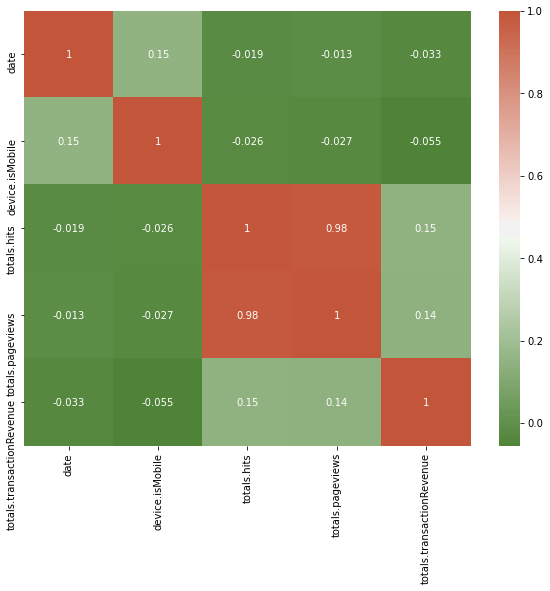

In [23]:

result = train.drop(columns=['totals.bounces', 'totals.newVisits', 'totals.visits', 'visitStartTime',
                             'visitId', 'visitNumber', 'trafficSource.adwordsClickInfo.page'])

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))

corr_matrix = result.corr()
# corr_matrix = corr_matrix.sort_values(by=['totals.transactionRevenue'], ascending= False) 
cmap_diverging = sns.diverging_palette(120, 20, as_cmap=True)

sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.index.values,
            cmap = cmap_diverging,
            annot = True)